<a href="https://colab.research.google.com/github/hhh6593/TIL/blob/master/get_image_file_pr3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
!ls

archive.zip		get_image_file_pr2.ipynb  light_intel.zip  seg_train
cifar-10-python.tar.gz	get_image_file_pr3.ipynb  seg_test


In [ ]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: flowers/flowers/rose/110472418_87b6a3aa98_m.jpg  
  inflating: flowers/flowers/rose/11102341464_508d558dfc_n.jpg  
  inflating: flowers/flowers/rose/11233672494_d8bf0a3dbf_n.jpg  
  inflating: flowers/flowers/rose/11694025703_9a906fedc1_n.jpg  
  inflating: flowers/flowers/rose/118974357_0faa23cce9_n.jpg  
  inflating: flowers/flowers/rose/11944957684_2cc806276e.jpg  
  inflating: flowers/flowers/rose/12165480946_c4a3fe182d_n.jpg  
  inflating: flowers/flowers/rose/12202373204_34fb07205b.jpg  
  inflating: flowers/flowers/rose/12238827553_cf427bfd51_n.jpg  
  inflating: flowers/flowers/rose/12240165555_98625b1e88_n.jpg  
  inflating: flowers/flowers/rose/12240303_80d87f77a3_n.jpg  
  inflating: flowers/flowers/rose/12240577184_b0de0e53ea_n.jpg  
  inflating: flowers/flowers/rose/12243068283_ee4c2683e2_n.jpg  
  inflating: flowers/flowers/rose/12243069253_e512464095_n.jpg  
  inflating: flowers/flowers/rose/123128873_546b8b

In [74]:
batch_size = 32
img_height=32
img_weidth=32

In [75]:
!ls

archive.zip		get_image_file_pr2.ipynb  seg_test
cifar-10-python.tar.gz	get_image_file_pr3.ipynb  seg_train
flowers			light_intel.zip


In [76]:
data_path = '/content/drive/My Drive/Colab Notebooks/flowers'

In [77]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(data_path,
                                                    target_size=(img_height, img_weidth),
                                                    batch_size=batch_size,
                                                    subset='training',
                                                    seed=123)

validation_generator = train_datagen.flow_from_directory(data_path,
                                                    target_size=(img_height, img_weidth),
                                                    batch_size=batch_size,
                                                    subset='validation',
                                                    seed=123)

Found 3462 images belonging to 5 classes.
Found 861 images belonging to 5 classes.


####generator####
(32, 32, 32, 3) (32, 5)


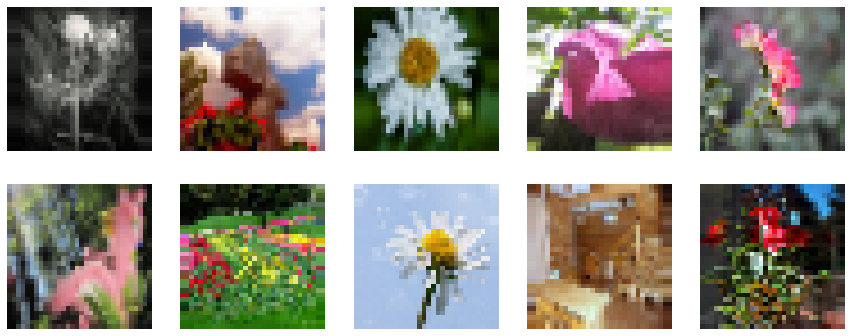

In [78]:
import matplotlib.pyplot as plt
print('####generator####')
for x, y in train_generator:
    print(x.shape, y.shape)
    
    fig, axes = plt.subplots(2, 5)
    fig.set_size_inches(15, 6)
    for i in range(10):
        axes[i//5, i%5].imshow(x[i])
        axes[i//5, i%5].axis('off')
    
    plt.show()
    break

In [80]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 15, 15, 128)       73856     
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 13, 13, 256)       295168    
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 6, 6, 256)       

In [81]:
history = model.fit(train_generator,
                    epochs = 10,
                    validation_data = validation_generator)

Epoch 1/10
109/109 [==============================] - 48s 437ms/step - loss: 1.6116 - accuracy: 0.2287 - val_loss: 1.4708 - val_accuracy: 0.3159
Epoch 2/10
109/109 [==============================] - 52s 476ms/step - loss: 1.4678 - accuracy: 0.3048 - val_loss: 1.3033 - val_accuracy: 0.4379
Epoch 3/10
109/109 [==============================] - 47s 430ms/step - loss: 1.3036 - accuracy: 0.4365 - val_loss: 1.1610 - val_accuracy: 0.5075
Epoch 4/10
109/109 [==============================] - 47s 430ms/step - loss: 1.1776 - accuracy: 0.5051 - val_loss: 1.1542 - val_accuracy: 0.5308
Epoch 5/10
109/109 [==============================] - 47s 431ms/step - loss: 1.1486 - accuracy: 0.5237 - val_loss: 1.1980 - val_accuracy: 0.5168
Epoch 6/10
109/109 [==============================] - 47s 429ms/step - loss: 1.0741 - accuracy: 0.5786 - val_loss: 1.1819 - val_accuracy: 0.5377
Epoch 7/10
109/109 [==============================] - 47s 431ms/step - loss: 1.0503 - accuracy: 0.5868 - val_loss: 1.1683 - val_ac

Text(0.5, 1.0, 'training and validation loss')

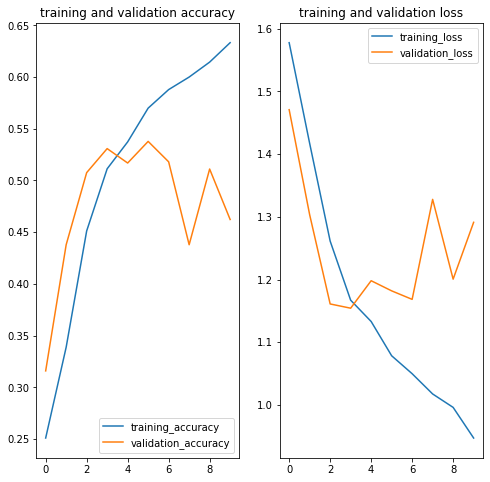

In [83]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'training_accuracy')
plt.plot(epochs_range, val_acc, label = 'validation_accuracy')
plt.legend(loc = 'lower right')
plt.title('training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'training_loss')
plt.plot(epochs_range, val_loss, label = 'validation_loss')
plt.legend(loc = 'upper right')
plt.title('training and validation loss')

In [ ]:
# #callback

# from keras.callbacks import ModelCheckpoint, EarlyStopping
# from datetime import datetime

# os.makedirs('models', exist_ok=True)
# start_time = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

# cp_earlystop = EarlyStopping(monitor='val_loss',
#                              mode='min',
#                              patience=10,
#                              verbose=1)

# cp_callback = ModelCheckpoint('models/%s-{epoch:02d}-{val_loss:.2f}.h5' % (start_time),
#                               monitor='val_loss',
#                               save_best_only=True,
#                               mode='min', 
#                               verbose=1)

In [ ]:
# from keras.models import load_model

# best_model = load_model('models/2021-02-21_04-33-27-94-0.02.h5')